# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Tratamento e limpeza de bases de dados</span>

### <span style="color:darkred">Redundância: dados não informativos ou irrelevantes</span>

Material Produzido por Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

## Redundância em dados

**Redundância em dados não-estruturados**

Muito comum pois dados binários e textuais possuem elementos que não auxiliam na análise. Exemplos incluem:

- o fundo de imagens e documentos

- timbre em documentos e cartas

- tipos de palavras em textos: artigos, conjunções, etc.


**Redundância em dados estruturados**

Diretamente relacionada a:
1. linhas/instâncias com valores repetidos (duplicados) 
2. colunas/atributos com valores constantes (iguais para todas as instâncias)
3. colunas/atributos com alta correlação

Nesse notebook trataremos apenas de *dados estruturados*

## Dados duplicados ou constantes

Bases de dados que contém informações repetidas ou atributos irrelevantes para obter as respostas que se espera da análise.

A redundância pode atrapalhar no projeto de modelos de aprendizado e estatísticos pois a quantidade de exemplos pode influenciar no viés do modelo.

**Redundância em bases de dados estruturadas**:

* Registros duplicados

* Atributos com valores iguais em todas as observações


Vamos carregar uma base de dados para mostrar exemplos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("./dados/people_prof_relig.csv")
data.dtypes

Name                object
Sex                 object
Year of Birth        int64
Country of Birth    object
Religion            object
City                object
Profession          object
Age                  int64
Experience           int64
Salary               int64
XP_great_10         object
XP_lesseq_10        object
dtype: object

In [2]:
data.head()

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary,XP_great_10,XP_lesseq_10
0,Desiree Dardar,F,1995,USA,Christian,New Orleans,Nurse,26,1,2580,N,Y
1,Lora Lemoine,F,1989,England,Christian,Birmingham,Nurse,32,1,2308,N,Y
2,Willene Wolfgram,F,1997,USA,Christian,New Orleans,Nurse,24,1,5196,N,Y
3,Herta Hatley,F,1988,USA,Christian,New Orleans,Nurse,33,1,4337,N,Y
4,Oleta Ouk,F,1991,Spain,Christian,Valencia,Nurse,30,1,4197,N,Y


In [3]:
data.shape

(100, 12)

**Linhas/registros duplicados**

O tipo mais comum de dados redundantes são as linhas ou registros duplicados, ou seja, aquelas que possuem todos os valores de atributos iguais.

In [4]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [5]:
data[data.duplicated()]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary,XP_great_10,XP_lesseq_10
46,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse,38,15,6300,Y,N
50,Ricardo Rima,M,1977,Peru,Christian,Arequipa,Nurse,44,16,6677,Y,N
93,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse,54,35,7141,Y,N
94,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse,54,35,7141,Y,N


A consulta acima mostra apenas as linhas "extra", ou seja, as duplicadas encontradas após a ocorrência da primeira linha original.

Assim, ao consultar por um dos nomes que temos acima duplicados, veremos que há duas linhas para ele, sendo a duplicada considerada a linha 51.

In [6]:
data[data['Name']=='Carlos Cobre']

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary,XP_great_10,XP_lesseq_10
45,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse,38,15,6300,Y,N
46,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse,38,15,6300,Y,N


Podemos usar a opção `keep` para manter todas as duplicatas, mostrando seus valores

In [11]:
data[data.duplicated(keep=False)]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary,XP_great_10,XP_lesseq_10
45,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse,38,15,6300,Y,N
46,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse,38,15,6300,Y,N
48,Ricardo Rima,M,1977,Peru,Christian,Arequipa,Nurse,44,16,6677,Y,N
50,Ricardo Rima,M,1977,Peru,Christian,Arequipa,Nurse,44,16,6677,Y,N
92,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse,54,35,7141,Y,N
93,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse,54,35,7141,Y,N
94,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse,54,35,7141,Y,N


Felizmente, temos uma funcão pronta para remover duplicatas de dataframes, `drop_duplicates()`, na qual podemos manter a primeira ocorrência da linha duplicada: `first`, a última: `last`, ou remover todas as que aparecem duplicadas: `False`.

In [12]:
d_ndup = data.drop_duplicates(keep='first')
d_ndup[d_ndup['Name']=='Carlos Cobre']

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary,XP_great_10,XP_lesseq_10
45,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse,38,15,6300,Y,N


In [13]:
d_ndup[d_ndup.duplicated(keep=False)]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary,XP_great_10,XP_lesseq_10


---

**Duplicidade em atributos**

A duplicidade pode gerar problemas quando aparece isolada em determinado atributo. 

Nessa base de dados um atributo que pode ser sensível a isso é o nome

In [14]:
d_ndup.duplicated(['Name'])

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 96, dtype: bool

In [15]:
d_ndup[d_ndup.duplicated(['Name'], keep=False)]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary,XP_great_10,XP_lesseq_10
73,Apolonia Abler,F,1967,Australia,Christian,Brisbane,Nurse,54,23,5496,Y,N
92,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse,54,35,7141,Y,N


Notamos que, apesar de ter o mesmo nome, sexo e ano de nascimento, as duas pessoas nasceram em países diferentes e portanto seria preciso consultar algum especialista do domínio para tomar decisões como a de excluir ou desconsiderar uma dessas linhas

---
**Atributos constantes**

Investigando os atributos Profession e Religion, mostrando suas frequencias, notamos que todas as linhas tem o mesmo valor para esses atributos.

Apesar do valor informativo, ao construir modelos computacionais, por exemplo classificadores, esses atributos representam um aumento na dimensionalidade sem contribuir para a tarefa principal, classificação.

Podemos usar o método `nunique()` para obter a contagem de valores distintos

In [19]:
print(d_ndup['Profession'].value_counts())
print(d_ndup['Religion'].value_counts())

Nurse    96
Name: Profession, dtype: int64
Christian    96
Name: Religion, dtype: int64


In [21]:
# busca os nomes das colunas cujo número de valores únicos é <= 1
att_const = np.array(d_ndup.columns[d_ndup.nunique() <= 1])
print(att_const)

['Religion' 'Profession']


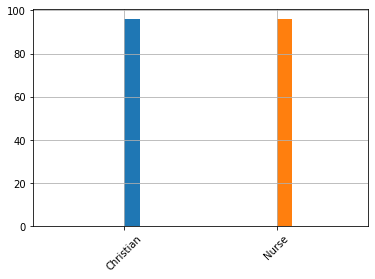

In [22]:
for att in att_const:
    d_ndup[att].hist(xrot=45)

In [23]:
d_ndup[att_const]

,Religion,Profession
0,Christian,Nurse
1,Christian,Nurse
2,Christian,Nurse
3,Christian,Nurse
4,Christian,Nurse
...,...,...
95,Christian,Nurse
96,Christian,Nurse
97,Christian,Nurse
98,Christian,Nurse


In [24]:
data_nred = d_ndup.drop(att_const, axis=1)

In [25]:
data_nred.sample(5)

,Name,Sex,Year of Birth,Country of Birth,City,Age,Experience,Salary,XP_great_10,XP_lesseq_10
64,Kathey Kleiman,F,1973,USA,New Orleans,48,20,6905,Y,N
32,Marcel Olsen,M,1984,Canada,Vancouver,37,8,6490,N,Y
73,Apolonia Abler,F,1967,Australia,Brisbane,54,23,5496,Y,N
10,Marla Olson,F,1994,Peru,Arequipa,27,1,3766,N,Y
1,Lora Lemoine,F,1989,England,Birmingham,32,1,2308,N,Y


## Atributos simétricos e correlacionados

Alguns atributos podem estar altamente correlacionados com outros. Esses atributos oferecem pouca contribuição no sentido de melhorar o que sabemos sobre o conjunto de dados. 

#### Simétricos

Atributos cujo valor pode ser obtido pela inversão de outro.

#### Correlacionados

Atributos cujo valor pode ser explicado (ainda que parcialmente) pelo valor de outra variável


---
#### Atributos irrelevantes e aprendizado de máquina:

> Ao treinar modelos com atributos irrelevantes, correlacionados ou simétricos podemos incorrer em maior custo computacional ou problemas de convergência.


Os atributos XP_great_10 e XP_lesseq_10 são simétricos!

In [26]:
data_nred.head(7)

,Name,Sex,Year of Birth,Country of Birth,City,Age,Experience,Salary,XP_great_10,XP_lesseq_10
0,Desiree Dardar,F,1995,USA,New Orleans,26,1,2580,N,Y
1,Lora Lemoine,F,1989,England,Birmingham,32,1,2308,N,Y
2,Willene Wolfgram,F,1997,USA,New Orleans,24,1,5196,N,Y
3,Herta Hatley,F,1988,USA,New Orleans,33,1,4337,N,Y
4,Oleta Ouk,F,1991,Spain,Valencia,30,1,4197,N,Y
5,Esther Morgan,F,1991,Australia,Brisbane,30,1,1543,N,Y
6,Gabriel Paiva,M,1991,Portugal,Lisbon,30,1,2303,N,Y


Removendo um deles:

In [27]:
data_nsim = data_nred.drop(['XP_lesseq_10'], axis=1)

In [28]:
data_nsim.sample(2)

,Name,Sex,Year of Birth,Country of Birth,City,Age,Experience,Salary,XP_great_10
74,Kathy Kerrigan,F,1973,USA,New Orleans,48,24,4445,Y
98,Vinicius Vitorio,M,1959,Brazil,São Paulo,62,39,6830,Y



### Coeficiente de correlação
Uma ferramenta interessante para entender *dependências lineares* entre atributos é a **correlação** medida, por exemplo pelo método de Pearson.

No entanto, a correlação só é computada com valores numéricos.

> Por exemplo se houver atributos **categóricos** ***simétricos*** ou ***correlacionados***, a correlação não será suficiente para encontrar, sendo necessário recodificá-los caso haja suspeitas de que os atributos sejam redundantes


In [29]:
mat_corr = data_nsim.corr(method = 'pearson')
mat_corr

,Year of Birth,Age,Experience,Salary
Year of Birth,1.000000,-1.000000,-0.908208,-0.362197
Age,-1.000000,1.000000,0.908208,0.362197
Experience,-0.908208,0.908208,1.000000,0.432904
Salary,-0.362197,0.362197,0.432904,1.000000


Características da matriz de correlação:
- valores negativos indicam correlação inversa
- tem diagonal igual a 1 (auto-correlação)
- é simétrica

Vamos considerar como alta correlação atributos com valores iguais ou superiores a 0.95

Para facilitar:
- pegamos o valor absoluto da correlação, 
- consideramos apenas a matriz triangular superior - devido a simetria, e
- não incluimos a diagonal principal (para a qual todos os valores são 1)

In [30]:
mat_corr = np.abs(mat_corr)
mat_corr

,Year of Birth,Age,Experience,Salary
Year of Birth,1.000000,1.000000,0.908208,0.362197
Age,1.000000,1.000000,0.908208,0.362197
Experience,0.908208,0.908208,1.000000,0.432904
Salary,0.362197,0.362197,0.432904,1.000000


In [31]:
# o parametro k indica para nao incluir a diagonal principal
mask_tri = np.triu(np.ones(mat_corr.shape),k=1).astype(bool)
print(mask_tri)

[[False  True  True  True]
 [False False  True  True]
 [False False False  True]
 [False False False False]]


In [32]:
tri_sup = mat_corr.where(mask_tri)
print(tri_sup)

               Year of Birth  Age  Experience    Salary
Year of Birth            NaN  1.0    0.908208  0.362197
Age                      NaN  NaN    0.908208  0.362197
Experience               NaN  NaN         NaN  0.432904
Salary                   NaN  NaN         NaN       NaN


Para cada coluna das colunas da matriz triangular nas quais qualquer valor seja maior ou igual a 0.95

In [33]:
atrib_altacor = [col for col in tri_sup.columns if any(tri_sup[col] >= 0.95)]

In [34]:
atrib_altacor

['Age']

In [ ]:
data_nsim

In [35]:
data_clean = data_nsim.drop(data_nsim[atrib_altacor], axis=1)

In [36]:
data_clean.sample(10)

,Name,Sex,Year of Birth,Country of Birth,City,Experience,Salary,XP_great_10
83,Savannah Ball,F,1974,USA,New Orleans,26,7952,Y
7,Pablo Alvarez,M,1991,Mexico,Acapulco,1,2086,N
25,Shelley Mendoza,F,1978,Scotland,Edinburgh,7,5564,N
68,Elias Elmo,M,1970,Portugal,Lisbon,21,6709,Y
0,Desiree Dardar,F,1995,USA,New Orleans,1,2580,N
86,Terri Wilson,F,1962,Canada,Vancouver,28,4811,Y
89,Vivian Arnold,F,1960,Brazil,São Paulo,33,5525,Y
33,Billie Duncan,F,1976,Scotland,Edinburgh,9,2391,N
70,Douglas Damario,M,1965,USA,New Orleans,22,3283,Y
95,Ariel Almada,F,1965,Portugal,Lisbon,36,9722,Y


#### Remover atributos redundantes e tamanho de datasets

A limpeza de dados redundantes permite reduzir a base de dados sem perder informação:
* reduzindo seu tamanho total
* minimizando problemas com modelagem, como a "maldição da dimensionalidade"

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              100 non-null    object
 1   Sex               100 non-null    object
 2   Year of Birth     100 non-null    int64 
 3   Country of Birth  100 non-null    object
 4   Religion          100 non-null    object
 5   City              100 non-null    object
 6   Profession        100 non-null    object
 7   Age               100 non-null    int64 
 8   Experience        100 non-null    int64 
 9   Salary            100 non-null    int64 
 10  XP_great_10       100 non-null    object
 11  XP_lesseq_10      100 non-null    object
dtypes: int64(4), object(8)
memory usage: 9.5+ KB


In [38]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              96 non-null     object
 1   Sex               96 non-null     object
 2   Year of Birth     96 non-null     int64 
 3   Country of Birth  96 non-null     object
 4   City              96 non-null     object
 5   Experience        96 non-null     int64 
 6   Salary            96 non-null     int64 
 7   XP_great_10       96 non-null     object
dtypes: int64(3), object(5)
memory usage: 6.8+ KB


In [39]:
6.8/9.5

0.7157894736842105